Imports

In [56]:
# conda install seaborn

In [57]:
# conda install -c conda-forge folium 

In [58]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [59]:
# multiple files present in the .zip file
# using zipfile
filename = 'archive.zip'

# opening zip file in read mode
with ZipFile(filename, 'r') as zip:
    # reading the contents of the zip file
    print('Reading contents...')
    zip.printdir()
    # Extract the contents 
    print("Extracting ...")
    zip.extractall()
    print("Done!")

Reading contents...
File Name                                             Modified             Size
AB_NYC_2019.csv                                2019-10-27 22:06:18      7077973
New_York_City_.png                             2019-10-27 22:06:20       192340
Extracting ...
Done!


In [60]:
# getting the dataset set (.csv)
path = 'AB_NYC_2019.csv'
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [61]:
# inspecting the shape of the dataframe
print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")
print(f"Features:\n {df.columns.to_list()}\n")
print(f"Missing values: {df.isna().values.sum()}")
print(f"Unique values:\n {df.nunique()}\n")

Rows: 48895
Cols: 16
Features:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values: 20141
Unique values:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64



In [62]:
# looking at the data types and non empty counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [63]:
# last_review and number_of_reviews column have significantly 
# more missing values compared to others
# Not everyone leaves reviews
# Months where the location was not occupied would have no reviews
df_null_count = df.isna().sum(axis=0)
df_null_count

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [64]:
# count and percentage of missing value
# ~ 20% of the data is missing in the last_review and reviews_per_month columns
total = df.isna().sum().sort_values(ascending=False)
percent = (((df.isnull().sum())*100)/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [65]:
# null features
var_with_null = [var for var in df.columns if df[var].isna().sum() > 1]

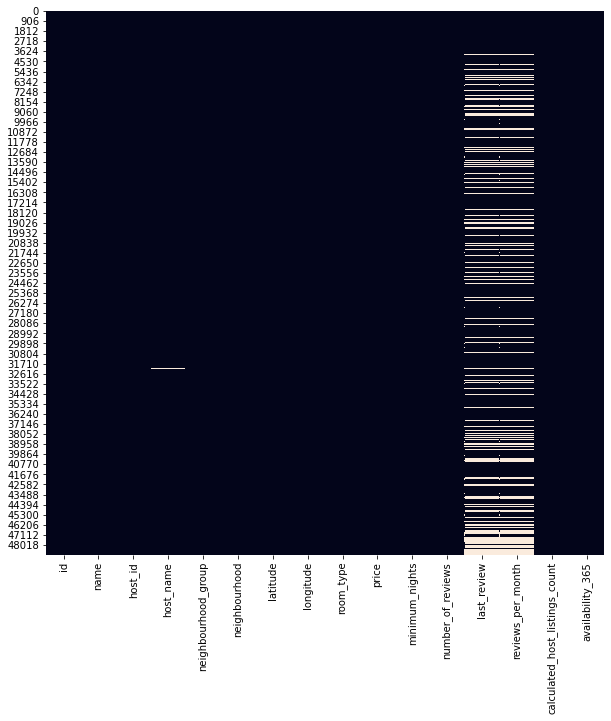

In [66]:
## Visualizing the missing values 
# visual makes it easier to see where the distribution of missing values
plt.figure(figsize=(10, 10))
sns.heatmap(df.isna(), cbar=False);

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Data Preprocessing

In [119]:
# Dropping the features that are insignificant
# feature 'reviews_per_month' has nan values which we will
# replace with 0.

X = df.copy()
X.drop(columns=['id', "name", 'host_id', 'host_name', 'last_review'], inplace=True, axis=1)
X['reviews_per_month'] = X['reviews_per_month'].replace(np.nan, 0)

In [75]:
# seperating the data to target variable

y = df['price']
X.drop(labels='price', axis=1, inplace=True);

In [120]:
## Checking to see if there are any missing values

X.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [121]:
## feature names before the feature transformation
X.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Splitting the dataset into training, validation and test set

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [123]:
print(f"Size of train set: {X_train.shape, y_train.shape}")
print(f"Size of validation set: {X_val.shape, y_val.shape}")
print(f"Size of test set: {X_test.shape, y_test.shape}")

Size of train set: ((39604, 11), (39604,))
Size of validation set: ((4401, 11), (4401,))
Size of test set: ((4890, 11), (4890,))


In [126]:
### Since we have both categorical and discrete variables let's use column transform

## first continuous variables

numeric_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ])

In [127]:
## discrete variables 

categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

In [128]:
## setting up the transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Linear Regression

In [129]:
## Using the pipeline to combine column transform and linear regression model

model = make_pipeline(
    preprocessor,
    LinearRegression())

In [130]:
# fitting the model

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['neighbourhood_group'

In [131]:
# scoring the model on training set

model.score(X_train, y_train)

0.1239935519388593

In [135]:
# scoring the model

linear_train_score = model.score(X_test, y_test)

In [136]:
linear_val_score = model.score(X_val, y_val)
print(f"Training set R2 score of linear regression {linear_train_score:.2f} and validation set R2 score {linear_val_score:.2f}")

Training set R2 score of linear regression 0.07 and validation set R2 score 0.15


### Linear Regression

Using 1 holdout set for validation

#### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVR

# train and fit SVM

pipe_svm = make_pipeline(StandardScaler(),
                        SVR(C=1.0, epsilon=0.2))
pipe_svm.fit(X_train, y_train)
svm_train_score = pipe_svm.score(X_train, y_train)
svm_val_score = pipe_svm.score(X_val, y_val)
print(f"Training set R2 score of SVM {svm_train_score:.2f} and validation set R2 score {svm_val_score:.2f}")

In [138]:
model = make_pipeline(
    preprocessor,
    SVR())

In [139]:
# training the model
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'reviews_per_month',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['neighbourhood_group'

In [140]:
# scoring the model

svm_train_score = model.score(X_train, y_train)
svm_val_score = model.score(X_val, y_val)
print(f"Training set R2 score of SVM {svm_train_score:.2f} and validation set R2 score {svm_val_score:.2f}")

Training set R2 score of SVM 0.08 and validation set R2 score 0.13
